In [9]:
# Importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

# Importing the dataset
dataset = pd.read_csv(r"D:\Level 4\Semster 1\Machine Learning and Pattern Recognition\Project 3\project 3 Cars Kmeans\cars.csv")

# Display the first few rows of the dataset
dataset.head()


,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           261 non-null    float64
 1    cylinders    261 non-null    int64  
 2    cubicinches  261 non-null    object 
 3    hp           261 non-null    int64  
 4    weightlbs    261 non-null    object 
 5    time-to-60   261 non-null    int64  
 6    year         261 non-null    int64  
 7    brand        261 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 16.4+ KB


In [11]:
dataset.describe()

,mpg,cylinders,hp,time-to-60,year
count,261.000000,261.000000,261.000000,261.000000,261.000000
mean,23.144828,5.590038,106.360153,15.547893,1976.819923
std,7.823570,1.733310,40.499959,2.910625,3.637696
min,10.000000,3.000000,46.000000,8.000000,1971.000000
25%,16.900000,4.000000,75.000000,14.000000,1974.000000
50%,22.000000,6.000000,95.000000,16.000000,1977.000000
75%,28.800000,8.000000,138.000000,17.000000,1980.000000
max,46.600000,8.000000,230.000000,25.000000,1983.000000


In [12]:
# Extracting features
X = dataset.iloc[:, :-1].values

# Convert columns to numeric
X = pd.DataFrame(X)
X = X.apply(pd.to_numeric, errors='coerce')

# Replace NaN values with the mean
X.fillna(X.mean(), inplace=True)


In [13]:
X.head()

,0,1,2,3,4,5,6
0,14.0,8,350.0,165,4209.0,12,1972
1,31.9,4,89.0,71,1925.0,14,1980
2,17.0,8,302.0,140,3449.0,11,1971
3,15.0,8,400.0,150,3761.0,10,1971
4,30.5,4,98.0,63,2051.0,17,1978


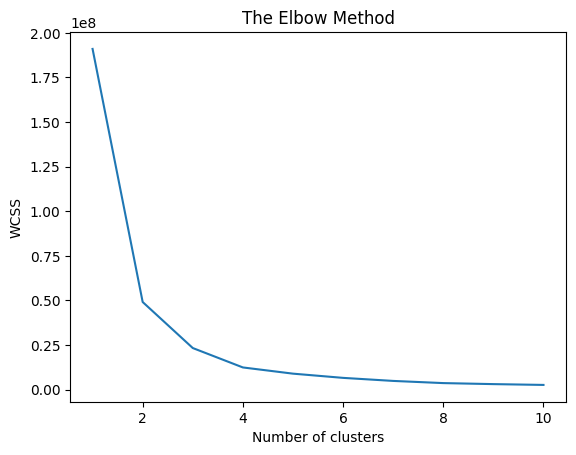

In [14]:
# Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [15]:
# Applying k-means to the cars dataset
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([2, 1, 0, 2, 1, 2, 2, 2, 0, 1, 1, 1, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1,
       0, 2, 1, 1, 1, 2, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 2, 0, 2, 2, 0, 0,
       0, 1, 2, 1, 1, 0, 2, 0, 0, 1, 2, 2, 0, 1, 1, 2, 0, 1, 0, 1, 2, 0,
       1, 1, 1, 2, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 2, 2, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 2, 0, 1, 2, 2, 0, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 2, 1, 1, 2, 0, 0, 1, 2, 1, 1, 2, 0, 1, 1, 2, 1, 1, 1, 1, 1,
       2, 0, 2, 2, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0,
       1, 0, 1, 1, 1, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       2, 0, 0, 1, 0, 1, 2, 0, 1, 0, 0, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 2, 1, 0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 2, 1, 2,
       0, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 1, 1, 2, 0, 1, 2, 0, 1, 1, 2, 0,
       2, 1, 2, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 1, 2, 1, 0, 0, 0])

In [17]:
kmeans.cluster_centers_

array([[2.02012346e+01, 6.11111111e+00, 2.24727394e+02, 1.09074074e+02,
        3.19351235e+03, 1.56790123e+01, 1.97671605e+03],
       [2.95466102e+01, 4.05084746e+00, 1.07669492e+02, 7.70338983e+01,
        2.24153390e+03, 1.66101695e+01, 1.97771186e+03],
       [1.48064516e+01, 7.83870968e+00, 3.47289015e+02, 1.58629032e+02,
        4.23211290e+03, 1.33548387e+01, 1.97525806e+03]])

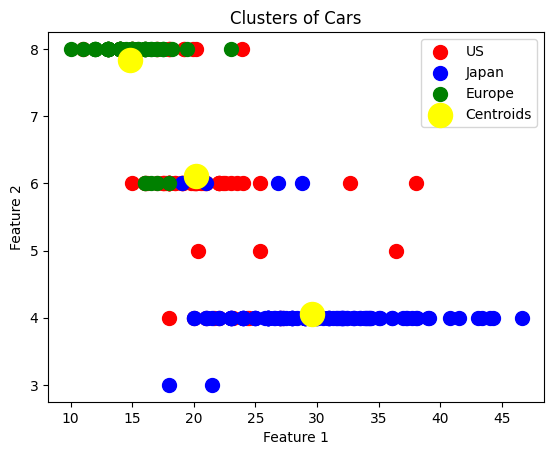

In [16]:


# Visualizing the clusters
plt.scatter(X[y_kmeans == 0][0], X[y_kmeans == 0][1], s=100, c='red', label='US')
plt.scatter(X[y_kmeans == 1][0], X[y_kmeans == 1][1], s=100, c='blue', label='Japan')
plt.scatter(X[y_kmeans == 2][0], X[y_kmeans == 2][1], s=100, c='green', label='Europe')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')

# Displaying the plot
plt.title('Clusters of Cars')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
